In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_csv('result.csv')
df.head()

,label,url,brand,name,price,skin type,spf,concern,concern 2,concern 3,key ingredient,formulation
0,face-moisturisers,https://www.myntra.com/face-moisturisers/lakme...,Lakme,Absolute Perfect Radiance Skin Lightening Day ...,₹ 79,All,NaN,General Care,NaN,NaN,NaN,Cream
1,face-moisturisers,https://www.myntra.com/face-moisturisers/bioti...,Biotique,Bio Morning Nectar Flawless Sustainable Skin M...,₹ 165,All,NaN,Uneven Skin Tone,Hydration,Dark Spots,Honey,Lotion
2,face-moisturisers,https://www.myntra.com/face-moisturisers/nivea...,Nivea,Unisex Aloe Hydration Skin Cream 100 ml,₹ 92,All,NaN,Dull Skin,Dryness,General Care,Aloe Vera,Cream
3,face-moisturisers,https://www.myntra.com/face-moisturisers/vi-jo...,VI-JOHN,Women Set of 5 Saffron Fairness Cream Advanced,₹ 187,All,15 to 30,Softening and Smoothening,Softening and Smoothening,Sun Protection,Vitamin E,Cream
4,face-moisturisers,https://www.myntra.com/face-moisturisers/lakme...,Lakme,Peach Milk Soft Creme 150g,₹ 192,All,NaN,General Care,NaN,NaN,NaN,Cream


In [3]:
df.columns

Index(['label', 'url', 'brand', 'name', 'price', 'skin type', 'spf', 'concern',
       'concern 2', 'concern 3', 'key ingredient', 'formulation'],
      dtype='object')

In [4]:
df.shape

(1872, 12)

## Data Preprocessing

In [5]:
df['label'].value_counts()


label
face-moisturisers    300
cleanser             300
concealer            300
mask-and-peel        300
foundation           300
sunscreen            272
eye-cream            100
Name: count, dtype: int64

In [6]:
df.isna().sum()


label                0
url                  0
brand               46
name                46
price               46
skin type          309
spf               1452
concern            380
concern 2         1136
concern 3         1319
key ingredient    1159
formulation        384
dtype: int64

In [7]:
df['concern 2'] = df['concern 2'].fillna('')
df['concern 3'] = df['concern 3'].fillna('')

df.head()

,label,url,brand,name,price,skin type,spf,concern,concern 2,concern 3,key ingredient,formulation
0,face-moisturisers,https://www.myntra.com/face-moisturisers/lakme...,Lakme,Absolute Perfect Radiance Skin Lightening Day ...,₹ 79,All,NaN,General Care,,,NaN,Cream
1,face-moisturisers,https://www.myntra.com/face-moisturisers/bioti...,Biotique,Bio Morning Nectar Flawless Sustainable Skin M...,₹ 165,All,NaN,Uneven Skin Tone,Hydration,Dark Spots,Honey,Lotion
2,face-moisturisers,https://www.myntra.com/face-moisturisers/nivea...,Nivea,Unisex Aloe Hydration Skin Cream 100 ml,₹ 92,All,NaN,Dull Skin,Dryness,General Care,Aloe Vera,Cream
3,face-moisturisers,https://www.myntra.com/face-moisturisers/vi-jo...,VI-JOHN,Women Set of 5 Saffron Fairness Cream Advanced,₹ 187,All,15 to 30,Softening and Smoothening,Softening and Smoothening,Sun Protection,Vitamin E,Cream
4,face-moisturisers,https://www.myntra.com/face-moisturisers/lakme...,Lakme,Peach Milk Soft Creme 150g,₹ 192,All,NaN,General Care,,,NaN,Cream


In [8]:
df['concern'] = df['concern'] + ',' + df['concern 2'] + ',' + df['concern 3']
df['concern']

0                                          General Care,,
1                   Uneven Skin Tone,Hydration,Dark Spots
2                          Dull Skin,Dryness,General Care
3       Softening and Smoothening,Softening and Smooth...
4                                          General Care,,
                              ...                        
1867                                       Dark Circles,,
1868                Fine Lines and Wrinkles,Dark Circles,
1869                   Dark Circles,Dark Circles,Eye Bags
1870                                                  NaN
1871                        Dark Circles,Eye Bags,Dryness
Name: concern, Length: 1872, dtype: object

In [9]:
df.drop(columns=['concern 2', 'concern 3', 'spf', 'key ingredient', 'formulation'], inplace = True)

In [10]:
df2 = df[((df['label'] == 'face-moisturisers') | (df['label'] == 'mask-and-peel') | (df['label'] == 'cleanser') | (df['label'] == 'eye-cream'))]
df2
LABELS = list(df2.label.unique())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1000 non-null   object
 1   url        1000 non-null   object
 2   brand      967 non-null    object
 3   name       967 non-null    object
 4   price      967 non-null    object
 5   skin type  967 non-null    object
 6   concern    939 non-null    object
dtypes: object(7)
memory usage: 62.5+ KB


In [11]:
df2 = df2[df2['skin type'].isna() == False]
df2.index = [i for i in range(0, len(df2))]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 966
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      967 non-null    object
 1   url        967 non-null    object
 2   brand      967 non-null    object
 3   name       967 non-null    object
 4   price      967 non-null    object
 5   skin type  967 non-null    object
 6   concern    939 non-null    object
dtypes: object(7)
memory usage: 60.4+ KB


In [12]:
df2['concern'] = df2['concern'].str.lower()
df2['concern']

0                                         general care,,
1                  uneven skin tone,hydration,dark spots
2                         dull skin,dryness,general care
3      softening and smoothening,softening and smooth...
4                                         general care,,
                             ...                        
962                                       dark circles,,
963                fine lines and wrinkles,dark circles,
964                   dark circles,dark circles,eye bags
965                                                  NaN
966                        dark circles,eye bags,dryness
Name: concern, Length: 967, dtype: object

<Axes: title={'center': 'Face moisturizers'}, xlabel='concern'>

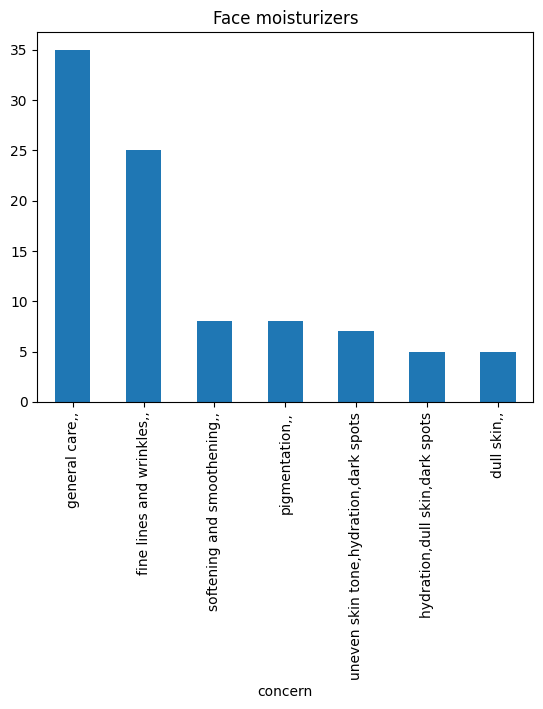

In [13]:
df2[df2['label'] == 'face-moisturisers']['concern'].value_counts()[:7].plot(kind='bar', title='Face moisturizers')

<Axes: title={'center': 'Mask & Peel'}, xlabel='concern'>

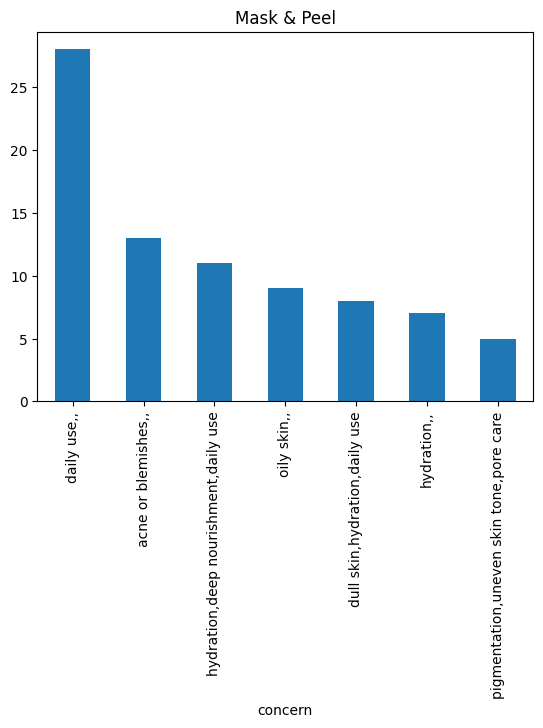

In [14]:
df2[df2['label'] == 'mask-and-peel']['concern'].value_counts()[:7].plot(kind='bar', title='Mask & Peel')

<Axes: title={'center': 'Eye cream'}, xlabel='concern'>

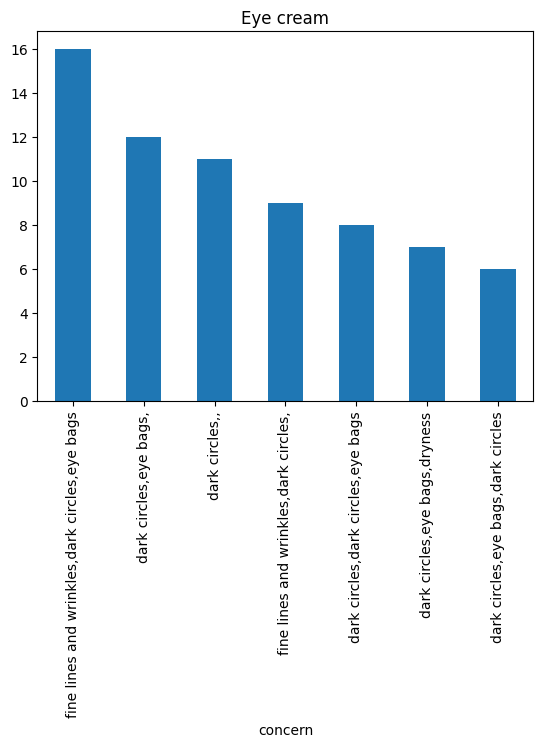

In [15]:
df2[df2['label'] == 'eye-cream']['concern'].value_counts()[:7].plot(kind='bar', title='Eye cream')

<Axes: title={'center': 'Cleanser'}, xlabel='concern'>

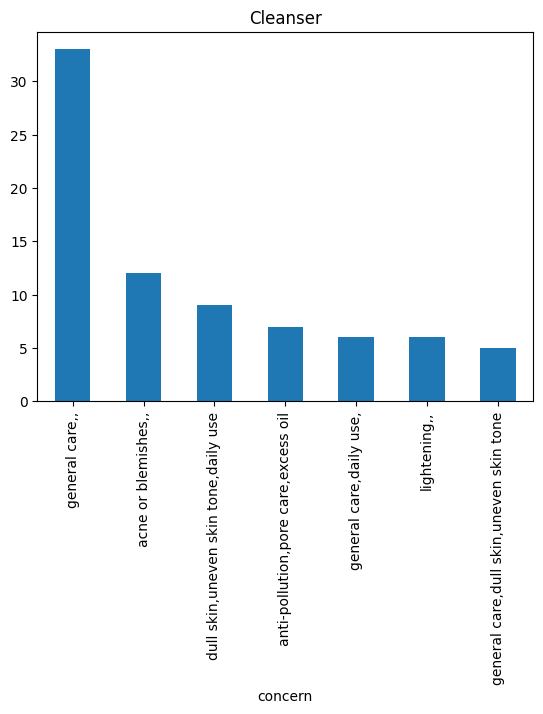

In [16]:
df2[df2['label'] == 'cleanser']['concern'].value_counts()[:7].plot(kind='bar', title='Cleanser')

In [17]:
top_concerns = {'face-moisturisers':'general care', 'mask-and-peel':'daily use', 'cleanser':'general care', 'eye-cream':'fine lines,wrinkles,dark circles,eye bags' }
entries = len(df2)
for i in range(entries):
    label = df2.iloc[i]['label']
    if pd.isnull(df2.iloc[i]['concern']):
        df2.loc[i, 'concern'] = top_concerns[label]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 966
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      967 non-null    object
 1   url        967 non-null    object
 2   brand      967 non-null    object
 3   name       967 non-null    object
 4   price      967 non-null    object
 5   skin type  967 non-null    object
 6   concern    967 non-null    object
dtypes: object(7)
memory usage: 92.7+ KB


In [18]:
df2['brand'] = df2['brand'].str.lower()
df2['name'] = df2['name'].str.lower()
df2['skin type'] = df2['skin type'].str.lower()
df2['concern'] = df2['concern'].str.replace(' and ', ',').str.replace(' or ', ',')
df2

,label,url,brand,name,price,skin type,concern
0,face-moisturisers,https://www.myntra.com/face-moisturisers/lakme...,lakme,absolute perfect radiance skin lightening day ...,₹ 79,all,"general care,,"
1,face-moisturisers,https://www.myntra.com/face-moisturisers/bioti...,biotique,bio morning nectar flawless sustainable skin m...,₹ 165,all,"uneven skin tone,hydration,dark spots"
2,face-moisturisers,https://www.myntra.com/face-moisturisers/nivea...,nivea,unisex aloe hydration skin cream 100 ml,₹ 92,all,"dull skin,dryness,general care"
3,face-moisturisers,https://www.myntra.com/face-moisturisers/vi-jo...,vi-john,women set of 5 saffron fairness cream advanced,₹ 187,all,"softening,smoothening,softening,smoothening,su..."
4,face-moisturisers,https://www.myntra.com/face-moisturisers/lakme...,lakme,peach milk soft creme 150g,₹ 192,all,"general care,,"
...,...,...,...,...,...,...,...
962,eye-cream,https://www.myntra.com/eye-cream/skinkraft/ski...,skinkraft,vitamin c+e under eye gel for pigmented under ...,₹ 449,all,"dark circles,,"
963,eye-cream,https://www.myntra.com/eye-cream/casmara/casma...,casmara,eye-cream 15 ml,₹ 2200,all,"fine lines,wrinkles,dark circles,"
964,eye-cream,https://www.myntra.com/eye-cream/myglamm/mygla...,myglamm,white youthfull hydrating eye cream with water...,₹ 716,all,"dark circles,dark circles,eye bags"
965,eye-cream,https://www.myntra.com/eye-cream/makeup-revolu...,makeup revolution london,hydro bank hydrating & cooling eye balm,₹ 1050,all,"fine lines,wrinkles,dark circles,eye bags"


In [19]:
def concern_elements(comma_sep_concerns):
    words = comma_sep_concerns.split(',')
    for w in words:
        if w != '':
            temp = w.rstrip()
            if temp in concerns:
                concerns[temp] += 1
            else:
                concerns[temp] = 1


            
# features
list(df2['skin type'].unique())
concerns = {}
for i in range(entries):
    concern_elements(df2.iloc[i]['concern'])

concerns

{'general care': 158,
 'uneven skin tone': 76,
 'hydration': 156,
 'dark spots': 71,
 'dull skin': 166,
 'dryness': 119,
 'softening': 112,
 'smoothening': 112,
 'sun protection': 21,
 'irregular textures': 6,
 'pigmentation': 71,
 'skin inflammation': 11,
 'fine lines': 133,
 'wrinkles': 133,
 'deep nourishment': 106,
 'blackheads': 61,
 'whiteheads': 61,
 'excess oil': 90,
 'skin sagging': 20,
 'acne': 155,
 'blemishes': 155,
 'tan removal': 48,
 'redness': 15,
 'anti-pollution': 60,
 'pore care': 110,
 'lightening': 27,
 'daily use': 158,
 'blackheads removal': 4,
 'oily skin': 16,
 'oil control': 15,
 'anti-ageing': 2,
 'anti acne scarring': 1,
 'skin tightening': 2,
 'dark circles': 103,
 'eye bags': 60}

In [20]:
c = list(concerns.keys())
for concern in c:
    if concerns[concern] <100:
        concerns.pop(concern)

concerns

{'general care': 158,
 'hydration': 156,
 'dull skin': 166,
 'dryness': 119,
 'softening': 112,
 'smoothening': 112,
 'fine lines': 133,
 'wrinkles': 133,
 'deep nourishment': 106,
 'acne': 155,
 'blemishes': 155,
 'pore care': 110,
 'daily use': 158,
 'dark circles': 103}

In [21]:
features = list(df2['skin type'].unique()) + list(concerns)
features

['all',
 'normal',
 'dry',
 'oily',
 'combination',
 'sensitive',
 'general care',
 'hydration',
 'dull skin',
 'dryness',
 'softening',
 'smoothening',
 'fine lines',
 'wrinkles',
 'deep nourishment',
 'acne',
 'blemishes',
 'pore care',
 'daily use',
 'dark circles']

In [22]:
features.remove('all')
features.remove('deep nourishment')
features

['normal',
 'dry',
 'oily',
 'combination',
 'sensitive',
 'general care',
 'hydration',
 'dull skin',
 'dryness',
 'softening',
 'smoothening',
 'fine lines',
 'wrinkles',
 'acne',
 'blemishes',
 'pore care',
 'daily use',
 'dark circles']

In [23]:
def search_concern(target, i):
    if target in df2.iloc[i]['concern']:
        return True
    return False

one_hot_encodings = np.zeros([entries, len(features)])

#skin types first
for i in range(entries):
    for j in range(5):
        target = features[j]
        sk_type = df2.iloc[i]['skin type']
        if sk_type == 'all':
            one_hot_encodings[i][0:5] = 1
        elif target == sk_type:
            one_hot_encodings[i][j] = 1

#other features
for i in range(entries):
    for j in range(5, len(features)):
        feature = features[j]
        if feature in df2.iloc[i]['concern']:
            one_hot_encodings[i][j] = 1

one_hot_encodings

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.]])

In [24]:
# utility functions
def name2index(name):
    return df2[df2["name"]==name].index.tolist()[0]

def index2prod(index):
    return df2.iloc[index]

def wrap(info_arr):
    result = {}
    result['brand'] = info_arr[0]
    result['name'] = info_arr[1]
    result['price'] = info_arr[2]
    result['url'] = info_arr[3]
    result['skin type'] = info_arr[4]
    result['concern'] = str(info_arr[5]).split(',')
    return result

def recs_cs(vector = None, name = None, label = None, count = 5):
    products = []
    if name:
        idx = name2index(name)
        fv = one_hot_encodings[idx]
    elif vector:
        fv = vector
        
    cs_values = cosine_similarity(np.array([fv, ]), one_hot_encodings)
    df2['cs'] = cs_values[0]
    
    if label:
        dff = df2[df2['label'] == label]
    else:
        dff = df2
    
    if name:
        dff = dff[dff['name'] != name]

    recommendations = dff.sort_values('cs', ascending=False).head(count)
    #   print(f"Top {count} matching {label} items")
    data = recommendations[['brand', 'name', 'price', 'url','skin type','concern']].to_dict('split')['data']
    for element in data:
        products.append(wrap(element))
    return products


# function to recommend essentials based on features directly or an existing product
def recs_essentials(vector = None, name = None):
    response = {}
    for label in LABELS:
        if name: 
            r = recs_cs(None, name, label)
        elif vector:
            r = recs_cs(vector, None, label)
        response[label] = r
    return response

In [25]:
# features = ['normal','dry','oily','combination', 'acne','sensitive','fine lines', 'wrinkles', 'redness', 'dull', 'pore ', 'pigmentation', 'blackheads','whiteheads', 'blemishes', 'dark circles', 'eye bags', 'dark spots']
x = [1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0]

y = recs_essentials(x, None)
y

{'face-moisturisers': [{'brand': 'innisfree',
   'name': 'bija trouble lotion 100ml',
   'price': '₹ 880',
   'url': 'https://www.myntra.com/face-moisturisers/innisfree/innisfree-bija-trouble-lotion-100ml/10858870/buy',
   'skin type': 'all',
   'concern': ['acne', 'blemishes', 'general care', 'pigmentation']},
  {'brand': 'the man company',
   'name': 'shea butter & vitamin e daily moisturiser for normal skin 50 g',
   'price': '₹ 251',
   'url': 'https://www.myntra.com/face-moisturisers/the-man-company/the-man-company-shea-butter--vitamin-e-daily-moisturiser-for-normal-skin-50-g/10320617/buy',
   'skin type': 'all',
   'concern': ['general care', 'skin sagging', 'softening', 'smoothening']},
  {'brand': 'the man company',
   'name': 'multani mitti & coco butter skin brightening cream 50 g',
   'price': '₹ 503',
   'url': 'https://www.myntra.com/face-moisturisers/the-man-company/the-man-company-multani-mitti--coco-butter-skin-brightening-cream-50-g/8191737/buy',
   'skin type': 'all',

In [33]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib.request
import os
import json
import pandas as pd

driver = webdriver.Chrome()

image_urls = []

for url in df2['url'].values[500:]:
    driver.get(url)
    try:
        image = driver.find_element(By.CLASS_NAME, 'image-grid-image').get_attribute("style").split("url(\"")[1].split('");')[0]
        image_urls.append(image)
    except:
        image_urls.append("")

In [34]:
len(image_urls)

967

In [ ]:
# es = df2.copy()
# es['image url'] = image_urls

# es.drop(columns=['cs'], inplace=True)
# es.to_csv('essential_skin_care.csv')
# es